# ALP Data Mining

Nama : Trisha Alexis Likorawung
<br>
NIM : 0706022110037


# Student Prediction

What you have to do...
1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

<h3>Import Modul</h3>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch

<h3>Import Dataset</h3>

In [4]:
url = "https://raw.githubusercontent.com/Trsh16/ALP-DATMIN/main/data.csv"
df = pd.read_csv(url,delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<h3>Data Cleaning And Data Preparation</h3>

In [5]:
#Check Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [25]:
#Check missing value
df.isnull()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#Check Duplicate
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool>

In [26]:
#Label Encode
label_encoder = LabelEncoder()
df_encode = df.copy()
df_encode['Target'] = label_encoder.fit_transform(df_encode['Target'])
df_encode.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [27]:
#Scaling
numerical_columns = df_encode.select_dtypes(include=['float64', 'int64']).columns

if 'Target' in numerical_columns:
    numerical_columns = numerical_columns.drop(['Target'])

scaler = StandardScaler()

df_scaled = df_encode.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


<H3>EDA

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


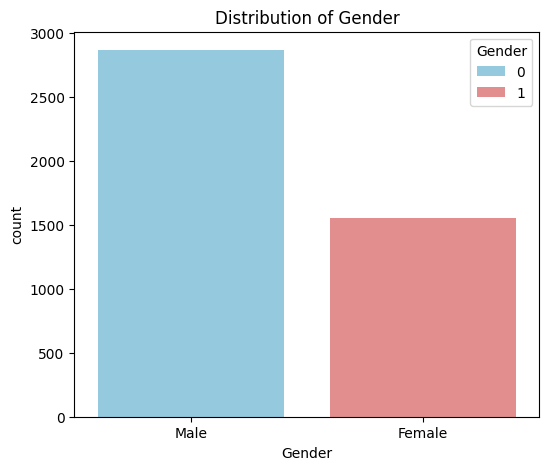

In [50]:
plt.figure(figsize=(6, 5))
colors = ['skyblue', 'lightcoral']
sns.countplot(x='Gender', data=df, palette=colors, hue='Gender')
plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

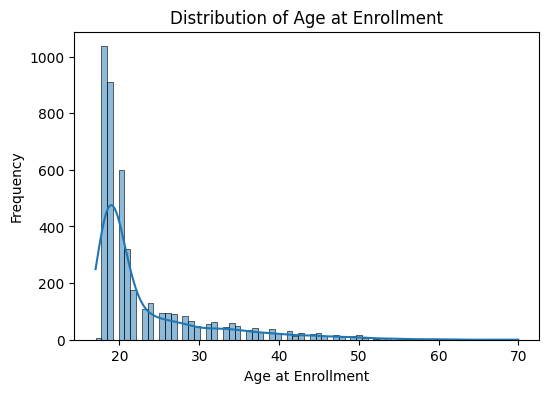

In [73]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

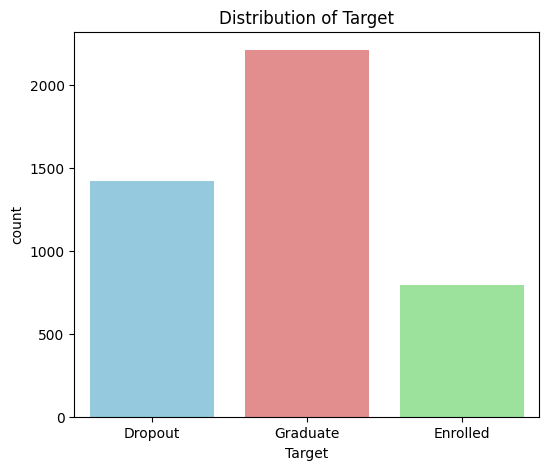

In [47]:
plt.figure(figsize=(6, 5))
target_colors = ['skyblue', 'lightcoral', 'lightgreen']
sns.countplot(x='Target', data=df, palette=target_colors, hue="Target")
plt.title('Distribution of Target')
plt.show()

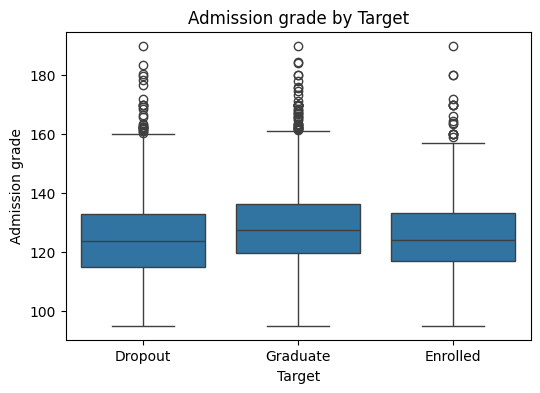

In [71]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Admission grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission grade')
plt.show()

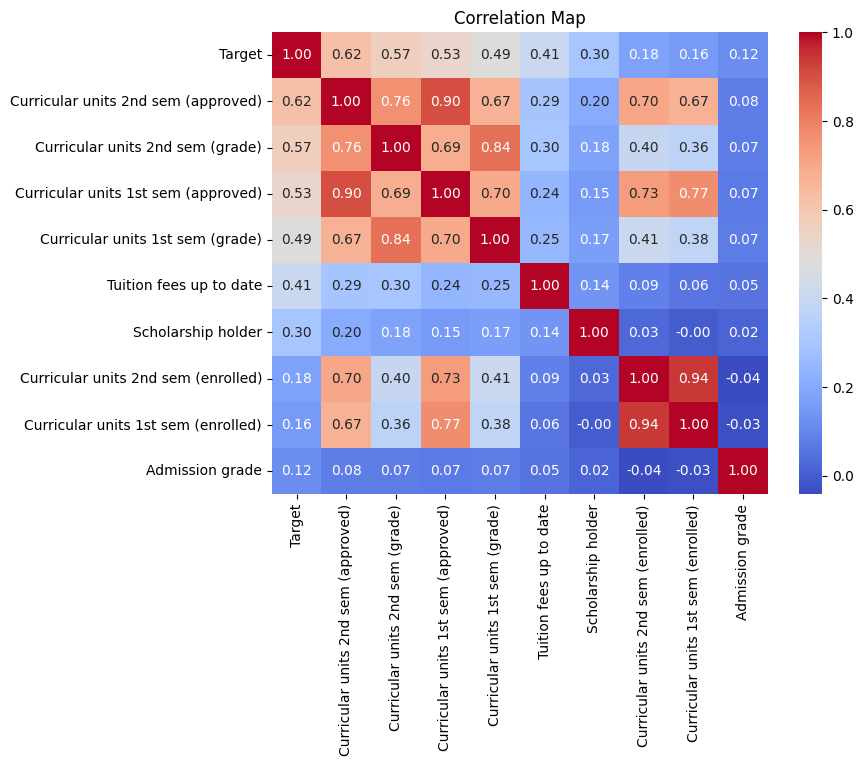

In [75]:
top_corr_columns =  df_scaled.corr().nlargest(10, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map')
plt.show()


<h3>Clustering

In [76]:
df_cluster = df_scaled.copy()

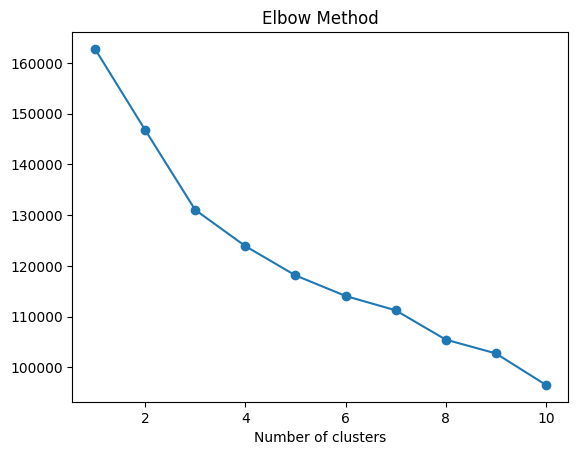

Cluster: 3


In [80]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

knee = KneeLocator(range(1, 11),
                       sse,
                       curve="convex",
                       direction="decreasing")

print('Cluster:', knee.elbow)

In [81]:
b_kmeans = KMeans(n_clusters=knee.elbow,n_init='auto',random_state=42)
b_kmeans.fit(df_cluster)
df['Kmeans Cluster'] = b_kmeans.labels_

In [82]:
aggregation_dict = {
    'Gender': lambda x: x.mode().iloc[0],
    'Marital status': lambda x: x.mode().iloc[0],  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'International': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Kmeans Cluster').agg(aggregation_dict)
cluster_summary['Scholarship holder'] = cluster_summary['Scholarship holder'].map({0: 'Non Scholarship', 1: 'Scholarship Holder'})
cluster_summary['International'] = cluster_summary['International'].map({0: 'Non International', 1: 'International'})
cluster_summary['Gender'] = cluster_summary['Gender'].map({0: 'Male', 1: 'Female'})
cluster_summary

,Gender,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Kmeans Cluster,,,,,,,,,,,,,,,
0,Male,1,16.237085,4.080873,126.939852,1,Non Scholarship,Non International,21.996310,5.277675,12.741707,5.147909,12.616993,0.068595,Graduate
1,Male,1,33.081851,9.622776,129.246975,1,Non Scholarship,Non International,28.729537,11.576512,12.632019,9.896797,12.649831,0.019217,Graduate
2,Female,1,23.000000,4.800224,126.402245,1,Non Scholarship,Non International,26.172840,0.455668,2.344969,0.114478,0.755743,-0.246644,Dropout


<function matplotlib.pyplot.show(close=None, block=None)>

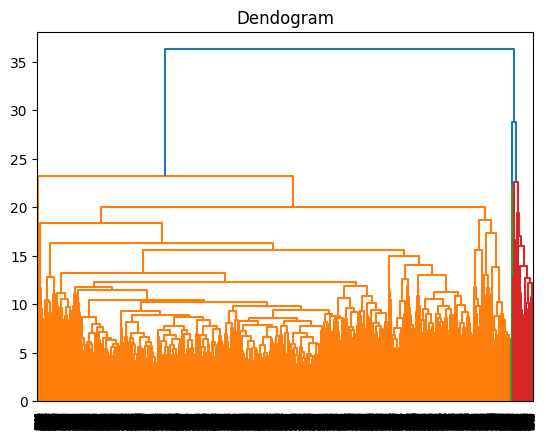

In [83]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [84]:
hc = AgglomerativeClustering(n_clusters=knee.elbow, metric='euclidean')
y_hc = hc.fit_predict(df_scaled)
df["Hierarchical Cluster"] = y_hc

In [85]:
aggregation_dict = {
    'Gender': lambda x: x.mode().iloc[0],
    'Marital status': lambda x: x.mode().iloc[0],  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'International': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Hierarchical Cluster').agg(aggregation_dict)
cluster_summary['Scholarship holder'] = cluster_summary['Scholarship holder'].map({0: 'Non Scholarship', 1: 'Scholarship Holder'})
cluster_summary['International'] = cluster_summary['International'].map({0: 'Non International', 1: 'International'})
cluster_summary['Gender'] = cluster_summary['Gender'].map({0: 'Male', 1: 'Female'})
cluster_summary

,Gender,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Hierarchical Cluster,,,,,,,,,,,,,,,
0,Male,1,17.080450,4.319493,126.845069,1,Non Scholarship,Non International,22.525952,5.051615,12.256899,4.895905,11.997655,0.067261,Graduate
1,Male,1,32.881226,8.172414,129.620690,1,Non Scholarship,Non International,28.804598,11.616858,12.663811,9.923372,12.688296,-0.053372,Graduate
2,Female,1,21.258993,4.516547,126.649640,1,Non Scholarship,Non International,24.873381,0.389928,1.816997,0.079137,0.487650,-0.303050,Dropout


<h3>Classification

In [86]:
df_class = df_scaled.copy()

In [87]:
X = df_class.drop(['Target'], axis=1)  
y = df_class['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [98]:
actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(rf_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})

randomforest_accuracy = accuracy_score(y_test, rf_pred)  
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest Accuracy: {randomforest_accuracy:.4f}")
comparison_df.sample(n=10)

Confusion Matrix:
[[290  29  55]
 [ 53  66  78]
 [ 10  27 498]]
Random Forest Accuracy: 0.7722


,Actual,Predicted
1040,Graduate,Graduate
415,Enrolled,Dropout
612,Dropout,Dropout
970,Dropout,Dropout
1081,Graduate,Graduate
7,Dropout,Graduate
1100,Dropout,Dropout
564,Dropout,Dropout
219,Enrolled,Enrolled
720,Graduate,Graduate


In [97]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_pred)
conf_matrix = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {logistic_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(logistic_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10)

Confusion Matrix:
[[289  34  51]
 [ 53  57  87]
 [ 15  31 489]]
Accuracy: 0.7550


,Actual,Predicted
405,Graduate,Graduate
759,Graduate,Graduate
825,Graduate,Graduate
48,Graduate,Graduate
1056,Graduate,Graduate
208,Graduate,Graduate
14,Dropout,Graduate
57,Graduate,Graduate
630,Graduate,Graduate
722,Graduate,Graduate


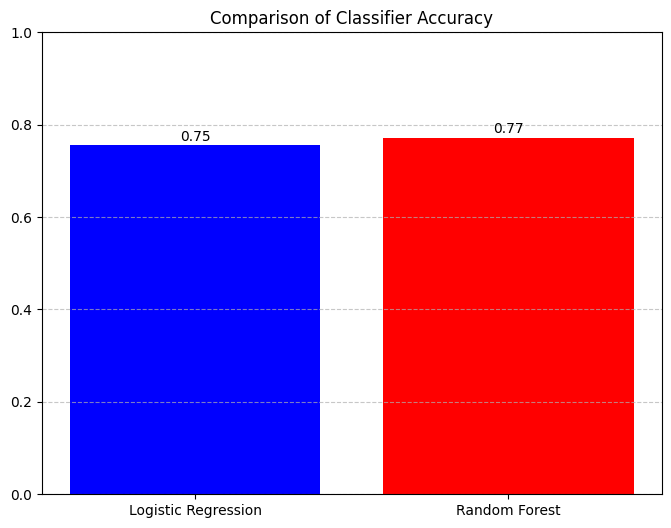

In [100]:
accuracies = [logistic_accuracy, randomforest_accuracy]
models = ['Logistic Regression', 'Random Forest']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'red'])
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.2f}', 
             ha='center', color='black', fontsize=10)
plt.title('Comparison of Classifier Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Hasilnya adalah Logistic Regresion adalah 0.75 sedangkan Random Forest adalah 0.77. Sehingga, lebih tinggi Random Forest.